# Import and data downloading

In [1]:
import os
import json
import random
from pathlib import Path
from zipfile import ZipFile
from PIL import Image

In [2]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from classification_models.tfkeras import Classifiers

In [3]:
kaggle_data = json.load(open(str(Path.home()) + '/kaggle.json', 'r'))
KAGGLE_USERNAME = kaggle_data['username']
KAGGLE_KEY = kaggle_data['key']

In [4]:
if KAGGLE_KEY and KAGGLE_USERNAME: print('Successfully imported access to kaggle')

Successfully imported access to kaggle


In [5]:
os.environ['KAGGLE_USERNAME'] = KAGGLE_USERNAME
os.environ['KAGGLE_KEY'] = KAGGLE_KEY

In [ ]:
print('Dataset will be downloaded as zip under the current directory')
!kaggle datasets download -d lasaljaywardena/furniture-images-dataset

# url -> https://www.kaggle.com/lasaljaywardena/furniture-images-dataset?select=furniture_images

In [ ]:
!unzip furniture-images-dataset.zip -d ../data

In [6]:
data_path = '../data/'

In [7]:
df = pd.read_csv(data_path + 'furniture_data_img.csv'); df

,Label,Furniture_Type,Image_File
0,furniture set,Other,/furniture_images/1634011558853_Furniture Set ...
1,bed room set,Bed / bedroom item,/furniture_images/1634011559093_Bed Room Set f...
2,6by6 teak box bed with hybrids mattress,Bed / bedroom item,/furniture_images/1634011559259_6by6 Teak Box ...
3,new spring mattress,Bed / bedroom item,/furniture_images/1634011559590_New Spring Mat...
4,exclusive 6 by teak box bed with spring mattress,Bed / bedroom item,/furniture_images/1634011559751_Exclusive 6 by...
...,...,...,...
9341,library cupboard,Storage,/furniture_images/1634028757107_Library Cupboa...
9342,piyestra cupboard,Storage,/furniture_images/1634028757269_Piyestra Cupbo...
9343,dark 3d wardrobe,Bed / bedroom item,/furniture_images/1634028757678_Dark 3d wardro...
9344,3 door cupboard,Bed / bedroom item,/furniture_images/1634028757990_3 Door cupboar...


In [8]:
def get_random_image(path):
    random_filename = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
    ])
    return random_filename

In [9]:
img_path = data_path + 'furniture_images' + '/' + 'furniture_images'

In [10]:
random_img = get_random_image(img_path); random_img

'1634017347026_Deer Table for sale.jpg'

In [11]:
def show_img(img_to_show):
    path = data_path + 'furniture_images' + '/' + 'furniture_images' + '/' + img_to_show
    return Image.open(path)

In [12]:
def get_img_labels(img):
    res = df.query(f"Image_File ==  '/furniture_images/{img}'")
    key_to_label = res.keys()[1]
    idx = res[key_to_label].keys()[0]
    return res[key_to_label][idx]

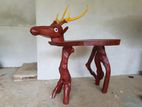

In [13]:
show_img(random_img)

In [14]:
get_img_labels(random_img)

'Table / chair'

In [15]:
def get_item(img_to_get):
    return (
        show_img(img_to_get),
        get_img_labels(img_to_get)
   )

## Data loading and augmentation

In [16]:
import random

class RandomSplitter:
    def __init__(self, valid_pct, seed=42):
        self.valid_pct = valid_pct
        random.seed = seed

In [17]:
class ImageBlock:
    """ A class that reppresent image """
    def __init__(self):
        return
    
    def __repr__(self):
        return 'ImageBlock() class'
    

    
class LabelBlock:
    """ A class that reppresent label """
    def __init__(self):
        return
    
    def __repr__(self):
        return 'LabelBlock() class'

In [26]:
import random

class DataBlock:
    """ A simple API to load and apply treatments to batch of data """
    def __init__(self, data, blocks, getItem, splitter, get_y, transformation):
        """
        @param data: the input data
        @param blocks: define the dependant and the independant variables
        @param getItem: help query all the data from a specific item
        @param splitter: manage the split between training and validation set
        @param get_y:  define the function to get the independant variable from a specific file
        @param transformation: pipeline of transformation we need to apply
        """
        self.blocks = blocks
        if data and splitter:
            self.train, self.valid = self.apply_split(data, splitter)
        self.getItem = getItem
        self.get_y = get_y
        
    def apply_split(self, dataset, splitter):
        len_to_split = int(splitter.valid_pct*len(dataset))
        valid = []
        
        for item in range(0, len_to_split):
            item_index_to_move = random.randint(0, len(dataset))
            valid.append(dataset[item_index_to_move])
            del dataset[item_index_to_move]

        return dataset, valid
    
    def __repr__(self):
        return '{ ' + \
            'train: ' + str(self.train) + \
            ', valid: ' + str(self.valid) + \
        ' }'

In [27]:
loader = DataBlock(
    data=[1,2,3,4,5,6,7,8,9,10],
    blocks=(ImageBlock, LabelBlock),
    getItem=get_item,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=get_img_labels,
    transformation=None    
)

loader

{ train: [1, 2, 3, 5, 6, 7, 8, 10], valid: [4, 9] }

Is it the right approach ? Still not sure, let's chill for a day and get back to it later !

In [31]:
loader.getItem(random_img)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=142x107 at 0x7F73842F61C0>,
 'Table / chair')

In [30]:
loader.get_y(random_img)

'Table / chair'

---

## Defining architecture

In [ ]:
ResNet34, _ = Classifiers.get('resnet34')
ResNet34

In [ ]:
# prepare your data
X = ...
y = ...

X = preprocess_input(X)

n_classes = 10

In [ ]:
ResNet18, preprocess_input = Classifiers.get('resnet18')

In [ ]:
base_model = ResNet18(input_shape=(224,224,3), weights='imagenet', include_top=False)

x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

# train
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y)